In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import math
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
dataset = pd.read_csv("analysis_data/analysis_all_without_googl.csv", index_col=0)
dataset = dataset.dropna()
dataset.head()

,volatility,aapl,amzn,fb,msft,ko,amt,hd,jpm,gs,pfe
date,,,,,,,,,,,
2022-02-02,22.090000,0.097277,-0.027943,0.086943,0.166354,0.833333,0.796825,0.651515,0.133515,0.583356,0.078622
2022-02-03,24.350000,0.179013,0.056630,0.126251,0.184344,-0.071428,0.833333,0.220106,-0.263505,0.555440,0.178556
2022-02-04,23.219999,0.112561,0.131079,0.129666,0.087896,0.476852,0.999999,0.372199,0.220000,0.389322,0.125115
2022-02-07,22.860001,0.203765,0.144420,0.119324,0.216208,0.182222,0.666666,0.640211,0.240431,0.403356,0.229981
2022-02-08,21.440001,0.281139,0.271328,0.084360,0.288758,0.126984,0.483333,0.395238,0.429000,0.568965,0.114804


## 1. time series split train and test

In [3]:
n_obs=10
X_train, X_test = dataset[0:-n_obs], dataset[-n_obs:]
print(X_train.shape, X_test.shape)

(44, 11) (10, 11)


## 2. Data Transformation

In [4]:
# diff transformation
X_train_transformed = X_train.diff().dropna()
X_train_transformed.head()

,volatility,aapl,amzn,fb,msft,ko,amt,hd,jpm,gs,pfe
date,,,,,,,,,,,
2022-02-03,2.260000,0.081736,0.084574,0.039308,0.017990,-0.904761,0.036508,-0.431409,-0.397021,-0.027916,0.099934
2022-02-04,-1.130001,-0.066452,0.074449,0.003415,-0.096448,0.548280,0.166666,0.152093,0.483505,-0.166119,-0.053441
2022-02-07,-0.359998,0.091204,0.013340,-0.010343,0.128312,-0.294629,-0.333333,0.268013,0.020431,0.014035,0.104866
2022-02-08,-1.420000,0.077374,0.126908,-0.034963,0.072550,-0.055238,-0.183333,-0.244973,0.188569,0.165609,-0.115177
2022-02-09,-1.480002,-0.074733,-0.077631,0.032149,0.090714,0.313172,0.220370,0.271428,-0.234128,0.134725,0.160822


## 3. ADF Test

In [5]:
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [10]:
result = adfuller(X_train_transformed['volatility'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -6.2197972596029505
p-value: 5.2571887618357043e-08
critical_values: {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}
Series is stationary


In [7]:
result = adfuller(X_train_transformed['aapl'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")



Test Statistics: -6.482515847554518
p-value: 1.2845371028581427e-08
critical_values: {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}
Series is stationary


In [8]:
result = adfuller(X_train_transformed['amzn'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -5.299921553657042
p-value: 5.477702167674637e-06
critical_values: {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}
Series is stationary


In [11]:
result = adfuller(X_train_transformed['fb'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -7.788180125238479
p-value: 8.07393109708417e-12
critical_values: {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}
Series is stationary


In [12]:
result = adfuller(X_train_transformed['msft'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -6.868092288698111
p-value: 1.5405359590289286e-09
critical_values: {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}
Series is stationary


In [13]:
result = adfuller(X_train_transformed['ko'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -4.182816723320213
p-value: 0.0007044470420267504
critical_values: {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}
Series is stationary


In [14]:
result = adfuller(X_train_transformed['amt'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -7.331672465781636
p-value: 1.1236226467004414e-10
critical_values: {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}
Series is stationary


In [15]:
result = adfuller(X_train_transformed['hd'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -6.057736072240873
p-value: 1.2335386360132713e-07
critical_values: {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}
Series is stationary


In [16]:
result = adfuller(X_train_transformed['jpm'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -9.930145273426174
p-value: 2.8371374885013605e-17
critical_values: {'1%': -3.596635636000432, '5%': -2.933297331821618, '10%': -2.6049909750566895}
Series is stationary


In [17]:
result = adfuller(X_train_transformed['gs'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -9.9185483401651
p-value: 3.0339319606520466e-17
critical_values: {'1%': -3.596635636000432, '5%': -2.933297331821618, '10%': -2.6049909750566895}
Series is stationary


In [18]:
result = adfuller(X_train_transformed['pfe'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -7.597060961601759
p-value: 2.444521982492846e-11
critical_values: {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}
Series is stationary


## 4. Granger’s Causality Test:

In [19]:
for maxlag in range(1,13):
    test = 'ssr-chi2test'
    
    def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

        dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

        for c in dataset.columns:
            for r in dataset.index:
                test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
                p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
                if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

                min_p_value = np.min(p_values)
                dataset.loc[r,c] = min_p_value # CORRECTED!!

        dataset.columns = [var + '_x' for var in variables]

        dataset.index = [var + '_y' for var in variables]

        return dataset

    result = grangers_causality_matrix(X_train_transformed, variables = X_train_transformed.columns) # CHANGE NAME

    # Add MultiIndex Header
    title = "Granger Causality Test Results:" # CHANGE NAME
    styler = result.style.set_caption(title).set_table_styles([{'selector': 'caption', # CHANGE NAME
                                                                      'props': [('color', 'black'),
                                                                                ('font-size', '12px'),
                                                                                ('font-style', 'italic'),
                                                                                ('font-weight', 'bold'),
                                                                                ('text-align', 'center')]}])

    print(maxlag)
    display(styler)

1


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.507600,0.271400,0.866000,0.667600,0.575200,0.266300,0.635500,0.732200,0.535900,0.694900
aapl_y,0.467200,1.000000,0.503300,0.534400,0.796300,0.336900,0.504200,0.781000,0.341600,0.732100,0.714700
amzn_y,0.491400,0.242100,1.000000,0.384900,0.228400,0.155800,0.238300,0.889800,0.770000,0.545700,0.696600
fb_y,0.502700,0.371100,0.861800,1.000000,0.474900,0.773400,0.493900,0.430800,0.241200,0.555400,0.974200
msft_y,0.365300,0.009300,0.424000,0.477900,1.000000,0.294600,0.287900,0.485900,0.016100,0.171300,0.695700
ko_y,0.381200,0.335000,0.345700,0.678100,0.930000,1.000000,0.809100,0.317700,0.501900,0.837300,0.812600
amt_y,0.827000,0.148100,0.594500,0.081400,0.481300,0.137800,1.000000,0.101300,0.010000,0.026000,0.055200
hd_y,0.825000,0.340500,0.191500,0.937700,0.046800,0.895300,0.706400,1.000000,0.171300,0.329300,0.116000
jpm_y,0.126900,0.174700,0.686000,0.066300,0.686500,0.292800,0.601300,0.235500,1.000000,0.635900,0.608700
gs_y,0.577800,0.998800,0.682800,0.400500,0.008600,0.910700,0.872200,0.221400,0.897200,1.000000,0.467700


2


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.343700,0.271400,0.488800,0.619700,0.428300,0.266300,0.510300,0.675400,0.535900,0.694900
aapl_y,0.438500,1.000000,0.281500,0.534400,0.455300,0.336900,0.504200,0.026400,0.276400,0.050600,0.287900
amzn_y,0.324500,0.242100,1.000000,0.384900,0.112500,0.155800,0.238300,0.491400,0.770000,0.324200,0.696600
fb_y,0.502700,0.171800,0.222900,1.000000,0.474900,0.591300,0.493900,0.430800,0.241200,0.555400,0.832000
msft_y,0.365300,0.007000,0.323000,0.069500,1.000000,0.259300,0.287900,0.108000,0.007000,0.011100,0.555600
ko_y,0.234100,0.335000,0.129100,0.216800,0.770600,1.000000,0.422100,0.317700,0.500400,0.595200,0.511700
amt_y,0.120000,0.148100,0.594500,0.081400,0.481300,0.137800,1.000000,0.068500,0.002400,0.026000,0.055200
hd_y,0.251200,0.212600,0.085500,0.800600,0.046800,0.808200,0.267800,1.000000,0.043400,0.329300,0.116000
jpm_y,0.126900,0.066200,0.356700,0.066300,0.686500,0.292800,0.284800,0.148000,1.000000,0.518800,0.232700
gs_y,0.083200,0.044000,0.211500,0.400500,0.005700,0.764400,0.629100,0.129400,0.881200,1.000000,0.467700


3


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.305000,0.271400,0.422100,0.296300,0.105500,0.266300,0.510300,0.675400,0.535900,0.694900
aapl_y,0.320000,1.000000,0.170300,0.448900,0.242700,0.033300,0.317600,0.006000,0.276400,0.050600,0.287900
amzn_y,0.320900,0.242100,1.000000,0.161300,0.044400,0.155800,0.238300,0.491400,0.659300,0.324200,0.696600
fb_y,0.502700,0.171800,0.222900,1.000000,0.474200,0.506100,0.008100,0.291000,0.241200,0.087700,0.832000
msft_y,0.365300,0.007000,0.311600,0.069500,1.000000,0.259300,0.287900,0.108000,0.004400,0.011100,0.555600
ko_y,0.234100,0.335000,0.041100,0.135100,0.750900,1.000000,0.422100,0.317700,0.500400,0.595200,0.497400
amt_y,0.120000,0.148100,0.336700,0.081400,0.481300,0.137800,1.000000,0.068500,0.002400,0.026000,0.055200
hd_y,0.251200,0.068800,0.046400,0.560800,0.022600,0.430500,0.059500,1.000000,0.043400,0.329300,0.044400
jpm_y,0.126900,0.014100,0.138300,0.066300,0.339700,0.292800,0.129600,0.148000,1.000000,0.518800,0.232700
gs_y,0.083200,0.021000,0.211500,0.228500,0.005700,0.569600,0.507300,0.129400,0.881200,1.000000,0.467700


4


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.252100,0.199200,0.422100,0.296300,0.105500,0.266300,0.510300,0.675400,0.535900,0.694900
aapl_y,0.320000,1.000000,0.170300,0.448900,0.209500,0.033300,0.317600,0.005900,0.276400,0.050600,0.287900
amzn_y,0.203300,0.242100,1.000000,0.161300,0.044400,0.155800,0.202000,0.491400,0.659300,0.324200,0.696600
fb_y,0.502700,0.171800,0.222900,1.000000,0.474200,0.201600,0.008100,0.057800,0.241200,0.023100,0.085600
msft_y,0.365300,0.007000,0.311600,0.063200,1.000000,0.118200,0.287900,0.108000,0.004400,0.011100,0.555600
ko_y,0.100500,0.335000,0.031300,0.037500,0.750900,1.000000,0.148500,0.317700,0.500400,0.595200,0.497400
amt_y,0.120000,0.148100,0.336700,0.081400,0.481300,0.137800,1.000000,0.068500,0.002400,0.026000,0.003600
hd_y,0.013300,0.053900,0.046400,0.559400,0.013300,0.430500,0.059500,1.000000,0.043400,0.329300,0.007100
jpm_y,0.126900,0.000000,0.090100,0.066300,0.148700,0.292800,0.015500,0.091400,1.000000,0.518800,0.232700
gs_y,0.025900,0.021000,0.211500,0.134400,0.005700,0.136900,0.507300,0.129400,0.881200,1.000000,0.467700


5


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.176400,0.123000,0.422100,0.296300,0.098900,0.266300,0.510300,0.675400,0.535900,0.694900
aapl_y,0.320000,1.000000,0.170300,0.448900,0.139800,0.030400,0.078600,0.005900,0.276400,0.050600,0.179300
amzn_y,0.179600,0.242100,1.000000,0.161300,0.044400,0.155800,0.202000,0.491400,0.020200,0.324200,0.647400
fb_y,0.502700,0.154900,0.222900,1.000000,0.474200,0.201600,0.008100,0.057800,0.241200,0.023100,0.039200
msft_y,0.365300,0.000400,0.272800,0.039800,1.000000,0.118200,0.287900,0.108000,0.004400,0.011100,0.555600
ko_y,0.019700,0.335000,0.031300,0.037500,0.729600,1.000000,0.148500,0.317700,0.500400,0.595200,0.497400
amt_y,0.120000,0.148100,0.336700,0.081400,0.481300,0.137800,1.000000,0.068500,0.002400,0.026000,0.002600
hd_y,0.002700,0.005700,0.005600,0.200900,0.009000,0.337400,0.059500,1.000000,0.043400,0.329300,0.000300
jpm_y,0.126900,0.000000,0.090100,0.066300,0.148700,0.292800,0.000000,0.080400,1.000000,0.266600,0.211000
gs_y,0.023300,0.021000,0.211500,0.113400,0.005700,0.136900,0.507300,0.129400,0.881200,1.000000,0.467700


6


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.176400,0.071500,0.422100,0.025100,0.074800,0.266300,0.188900,0.509100,0.219400,0.694900
aapl_y,0.301800,1.000000,0.170300,0.448900,0.139800,0.010000,0.078600,0.000000,0.276400,0.050600,0.040900
amzn_y,0.022800,0.242100,1.000000,0.161300,0.044400,0.155800,0.066100,0.491400,0.020200,0.324200,0.466200
fb_y,0.502700,0.056200,0.222900,1.000000,0.241900,0.201600,0.000100,0.025200,0.241200,0.023100,0.039200
msft_y,0.316600,0.000400,0.208400,0.039800,1.000000,0.118200,0.148100,0.108000,0.004400,0.011100,0.555600
ko_y,0.019700,0.046100,0.002600,0.037500,0.042900,1.000000,0.148500,0.317700,0.500400,0.595200,0.497400
amt_y,0.120000,0.148100,0.061800,0.081400,0.247600,0.137800,1.000000,0.068500,0.002400,0.026000,0.002600
hd_y,0.002700,0.005700,0.005600,0.200900,0.009000,0.337400,0.003700,1.000000,0.043400,0.329300,0.000300
jpm_y,0.126900,0.000000,0.090100,0.066300,0.148700,0.292800,0.000000,0.049600,1.000000,0.059800,0.195400
gs_y,0.007400,0.021000,0.154600,0.076800,0.002100,0.136900,0.507300,0.129400,0.881200,1.000000,0.467700


7


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.176400,0.071500,0.422100,0.025100,0.074800,0.221000,0.046400,0.509100,0.045800,0.503000
aapl_y,0.174800,1.000000,0.170300,0.374900,0.033600,0.008400,0.078600,0.000000,0.276400,0.009800,0.001100
amzn_y,0.013700,0.242100,1.000000,0.161300,0.044400,0.155800,0.007300,0.491400,0.002200,0.324200,0.466200
fb_y,0.502700,0.056200,0.222900,1.000000,0.178800,0.201600,0.000000,0.000200,0.162600,0.023100,0.000000
msft_y,0.180100,0.000400,0.205300,0.039800,1.000000,0.118200,0.025900,0.108000,0.004400,0.011100,0.555600
ko_y,0.019700,0.044600,0.002600,0.037500,0.032500,1.000000,0.002000,0.317700,0.500400,0.367000,0.497400
amt_y,0.120000,0.148100,0.006700,0.081400,0.137200,0.067500,1.000000,0.068500,0.002400,0.026000,0.000200
hd_y,0.002700,0.005700,0.005600,0.200900,0.009000,0.337400,0.000000,1.000000,0.043400,0.135800,0.000200
jpm_y,0.126900,0.000000,0.084800,0.066300,0.148700,0.242200,0.000000,0.049600,1.000000,0.059800,0.022100
gs_y,0.007300,0.021000,0.119400,0.024000,0.002100,0.036400,0.507300,0.129400,0.881200,1.000000,0.467700


8


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.034600,0.000400,0.216800,0.025100,0.074800,0.154600,0.046400,0.463800,0.045800,0.392500
aapl_y,0.174800,1.000000,0.170300,0.240300,0.027700,0.005900,0.004300,0.000000,0.276400,0.007100,0.001100
amzn_y,0.013700,0.211100,1.000000,0.016900,0.012500,0.155800,0.007300,0.485500,0.002200,0.324200,0.466200
fb_y,0.502700,0.023200,0.167200,1.000000,0.178800,0.201600,0.000000,0.000000,0.047700,0.023100,0.000000
msft_y,0.149300,0.000100,0.190800,0.039800,1.000000,0.118200,0.001800,0.108000,0.004400,0.011100,0.555600
ko_y,0.019700,0.044600,0.002600,0.021100,0.015500,1.000000,0.001800,0.305200,0.476400,0.367000,0.497400
amt_y,0.120000,0.038900,0.006700,0.001500,0.137200,0.037000,1.000000,0.068500,0.001400,0.002300,0.000200
hd_y,0.000100,0.005700,0.005600,0.200900,0.009000,0.191300,0.000000,1.000000,0.043400,0.095000,0.000000
jpm_y,0.126900,0.000000,0.000100,0.066300,0.040400,0.242200,0.000000,0.000600,1.000000,0.054000,0.022100
gs_y,0.007300,0.012900,0.018500,0.008000,0.002100,0.036400,0.507300,0.129400,0.881200,1.000000,0.401400


9


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.026100,0.000400,0.129700,0.001100,0.074800,0.154600,0.020700,0.047800,0.045800,0.286200
aapl_y,0.109600,1.000000,0.170300,0.240300,0.000600,0.002000,0.004300,0.000000,0.184800,0.005800,0.001100
amzn_y,0.013700,0.157300,1.000000,0.014700,0.012500,0.155800,0.001300,0.413300,0.000100,0.324200,0.133400
fb_y,0.305700,0.000000,0.167200,1.000000,0.134200,0.103400,0.000000,0.000000,0.045800,0.003900,0.000000
msft_y,0.098800,0.000100,0.190800,0.000100,1.000000,0.062000,0.001100,0.000900,0.004400,0.000600,0.555600
ko_y,0.019700,0.044600,0.002600,0.021100,0.015500,1.000000,0.001800,0.305200,0.036600,0.367000,0.497400
amt_y,0.120000,0.038900,0.000000,0.000700,0.135900,0.037000,1.000000,0.068500,0.000000,0.002200,0.000200
hd_y,0.000100,0.005700,0.003700,0.200900,0.009000,0.018800,0.000000,1.000000,0.043400,0.095000,0.000000
jpm_y,0.126900,0.000000,0.000000,0.066300,0.040400,0.006900,0.000000,0.000100,1.000000,0.054000,0.022100
gs_y,0.007300,0.012900,0.018500,0.006300,0.002100,0.036400,0.482600,0.019000,0.734800,1.000000,0.172000


10


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.007500,0.000000,0.080500,0.000200,0.074800,0.154600,0.016300,0.047800,0.045800,0.286200
aapl_y,0.000000,1.000000,0.170300,0.240300,0.000000,0.000600,0.004300,0.000000,0.184800,0.000100,0.001100
amzn_y,0.013000,0.157300,1.000000,0.003500,0.001400,0.155800,0.000000,0.215800,0.000100,0.324200,0.003200
fb_y,0.194900,0.000000,0.167200,1.000000,0.134200,0.068000,0.000000,0.000000,0.045800,0.000000,0.000000
msft_y,0.000000,0.000000,0.000400,0.000100,1.000000,0.062000,0.001100,0.000900,0.004400,0.000500,0.021300
ko_y,0.019700,0.044600,0.000200,0.021100,0.000000,1.000000,0.001600,0.305200,0.015200,0.164000,0.497400
amt_y,0.120000,0.002800,0.000000,0.000700,0.025200,0.004600,1.000000,0.007500,0.000000,0.000000,0.000000
hd_y,0.000000,0.005700,0.000000,0.200900,0.009000,0.001600,0.000000,1.000000,0.002300,0.073900,0.000000
jpm_y,0.126900,0.000000,0.000000,0.066300,0.039100,0.006900,0.000000,0.000100,1.000000,0.054000,0.000100
gs_y,0.007300,0.000000,0.018500,0.006300,0.002100,0.036400,0.482600,0.019000,0.734800,1.000000,0.165500


11


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.000000,0.000000,0.080500,0.000000,0.074800,0.069300,0.000100,0.047800,0.002600,0.000500
aapl_y,0.000000,1.000000,0.048900,0.087200,0.000000,0.000600,0.000200,0.000000,0.008300,0.000000,0.000000
amzn_y,0.000200,0.111000,1.000000,0.000000,0.000500,0.155800,0.000000,0.000000,0.000100,0.164600,0.003200
fb_y,0.002000,0.000000,0.167200,1.000000,0.028400,0.026300,0.000000,0.000000,0.045800,0.000000,0.000000
msft_y,0.000000,0.000000,0.000000,0.000000,1.000000,0.062000,0.000000,0.000000,0.004400,0.000300,0.021300
ko_y,0.000400,0.022500,0.000000,0.000100,0.000000,1.000000,0.000200,0.021800,0.009300,0.007200,0.497400
amt_y,0.000700,0.002800,0.000000,0.000700,0.025200,0.000200,1.000000,0.000000,0.000000,0.000000,0.000000
hd_y,0.000000,0.005700,0.000000,0.024000,0.009000,0.000000,0.000000,1.000000,0.000000,0.000200,0.000000
jpm_y,0.058000,0.000000,0.000000,0.066300,0.008100,0.006900,0.000000,0.000100,1.000000,0.054000,0.000000
gs_y,0.007300,0.000000,0.002500,0.002200,0.000000,0.036400,0.482600,0.000000,0.734800,1.000000,0.027400


12


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047600,0.000100,0.047800,0.000000,0.000500
aapl_y,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000200,0.000000,0.008300,0.000000,0.000000
amzn_y,0.000000,0.111000,1.000000,0.000000,0.000000,0.155800,0.000000,0.000000,0.000000,0.005000,0.000200
fb_y,0.000000,0.000000,0.000900,1.000000,0.028400,0.000000,0.000000,0.000000,0.003800,0.000000,0.000000
msft_y,0.000000,0.000000,0.000000,0.000000,1.000000,0.055100,0.000000,0.000000,0.000000,0.000000,0.010200
ko_y,0.000000,0.001500,0.000000,0.000000,0.000000,1.000000,0.000100,0.002600,0.000000,0.000600,0.165200
amt_y,0.000400,0.000100,0.000000,0.000000,0.025200,0.000200,1.000000,0.000000,0.000000,0.000000,0.000000
hd_y,0.000000,0.000400,0.000000,0.000100,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
jpm_y,0.000000,0.000000,0.000000,0.066300,0.000000,0.006900,0.000000,0.000000,1.000000,0.000700,0.000000
gs_y,0.000000,0.000000,0.000000,0.002200,0.000000,0.003000,0.045700,0.000000,0.734800,1.000000,0.021500


In [ ]:
# 早前6天的StockTwits Sentiment有助于更好地预测后市行情

## 5. AIC

In [28]:
model = VAR(X_train_transformed)
for i in [1,2,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -37.245813337525384
BIC :  -31.784565965777652
FPE :  7.989053335401229e-17
HQIC:  -35.24405018006332 

Lag Order = 2
AIC :  -42.77714006735215
BIC :  -32.20314658256703
FPE :  1.3251859271948208e-18
HQIC:  -38.926674635232345 

Lag Order = 4
AIC :  -738.0877315836366
BIC :  -716.9732953058372
FPE :  -0.0
HQIC:  -730.5120535432845 

Lag Order = 5
AIC :  -734.9933252507768
BIC :  -708.4471917141597
FPE :  -0.0
HQIC:  -725.5484138642652 

Lag Order = 6
AIC :  -734.2461900217902
BIC :  -702.1584467347958
FPE :  -0.0
HQIC:  -722.933757537042 

Lag Order = 7
AIC :  -731.0492597650166
BIC :  -693.308725065146
FPE :  -0.0
HQIC:  -717.8768023076857 

Lag Order = 8
AIC :  -723.4285072929266
BIC :  -679.9232000872656
FPE :  -0.0
HQIC:  -708.4104813633619 

Lag Order = 9
AIC :  -709.679547210154
BIC :  -660.2972949431606
FPE :  -0.0
HQIC:  -692.8387849247329 

Lag Order = 10
AIC :  -705.1853241579776
BIC :  -649.8145443837178
FPE :  -0.0
HQIC:  -686.5547414831419 

Lag Order 

/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


## 6. VAR Model

In [36]:
lag = 6
mod = VAR(X_train_transformed)
res_6 = mod.fit(lag)
print(res_6.summary())

/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1450: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 23, May, 2022
Time:                     19:53:18
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -702.158
Nobs:                     37.0000    HQIC:                  -722.934
Log likelihood:           13743.0    FPE:                   -0.00000
AIC:                     -734.246    Det(Omega_mle):        -0.00000
--------------------------------------------------------------------
Results for equation volatility
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.186271         0.000000    -12141099.643           0.000
L1.volatility         0.739604         0.000000      6000680.484           0.000
L1.aapl              -2.150500         0.000002      -9

## 7. Prediction

In [30]:
# Get the lag order
lag_order = res_6.k_ar # CHANGE res
print(lag_order)
# Input data for forecasting
input_data = X_train_transformed.values[-lag_order:]
print(input_data)
# forecasting
pred = res_6.forecast(y=input_data, steps=n_obs) # CHANGE res
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print(pred)

6
[[-0.729999   -0.02499565  0.0952265   0.02267381 -0.19550864  0.11636134
  -0.04435828 -0.00869582  0.04069456  0.38983276 -0.06511892]
 [ 0.43        0.05055814 -0.03143982 -0.0196106   0.10695283 -0.90364111
   0.25269097 -0.12628258  0.05882952 -0.14317251 -0.09569229]
 [ 1.229999   -0.04019904 -0.00293682 -0.03346268  0.01585091  0.45602225
   0.50000016 -0.08207034 -0.21204947  0.0877551   0.04811555]
 [-0.93       -0.00350233 -0.09288101 -0.01753108 -0.164996    0.07142837
  -0.39259234 -0.02485593 -0.01051702 -0.09215897  0.09341178]
 [-1.059999    0.13111353  0.17384804  0.09009063  0.09063659  0.12619052
  -0.14444472  0.11313882 -0.07982572  0.12083852 -0.02810726]
 [ 2.460001   -0.07809731 -0.01917997 -0.0433226   0.15188408  0.01080587
   0.23703695  0.20817741 -0.20218975 -0.06711506  0.12167393]]
            volatility_pred  aapl_pred  amzn_pred   fb_pred  msft_pred  \
date                                                                     
2022-04-06         1.068376

## 8. Invert Transformation

In [31]:
# inverting transformation
def invert_transformation(X_train, pred):
    forecast = pred.copy()
    columns = X_train.columns
    for col in columns:
        forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast
output = invert_transformation(X_train, pred)
output

,volatility_pred,aapl_pred,amzn_pred,fb_pred,msft_pred,ko_pred,amt_pred,hd_pred,jpm_pred,gs_pred,pfe_pred
date,,,,,,,,,,,
2022-04-06,22.098377,0.149038,0.177139,0.134554,0.172137,1.013418,0.265943,0.151460,-0.046053,-0.177319,0.333772
2022-04-07,22.900906,0.054427,-0.044105,0.202657,0.001772,0.941771,0.885159,0.579885,0.010160,0.113948,0.383812
2022-04-08,22.249208,0.250648,0.180407,0.212029,0.249871,0.884345,-0.119160,0.881127,0.229814,-0.020062,0.490630
2022-04-11,17.197136,0.064470,0.093517,0.228538,0.400845,1.083092,-0.313387,0.912221,0.263259,-0.487004,0.382318
2022-04-12,15.535326,0.282857,0.234761,0.235937,0.250116,1.090336,1.307551,0.933866,0.410137,-0.080840,0.659332
2022-04-13,21.196872,0.338565,0.302117,0.394668,0.374412,0.496222,0.390680,0.414714,-0.151624,0.063871,0.626690
2022-04-14,16.483699,0.260459,0.367295,0.301420,0.402577,1.397921,0.282290,0.155733,0.228356,-0.053886,0.717851
2022-04-18,10.119983,0.183924,0.194741,0.246654,0.274045,1.085158,0.339402,0.661277,0.114111,0.442748,0.714687
2022-04-19,11.378250,0.297340,0.374138,0.452043,0.399685,0.633242,-0.584464,0.768979,-0.017078,0.278661,0.783575


In [33]:
#combining predicted and real data set
combine = pd.concat([output['volatility_pred'], X_test['volatility']], axis=1)
combine['accuracy'] = round(combine.apply(lambda row: row.volatility_pred /row.volatility *100, axis = 1),2)
combine['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in combine['accuracy']],index = combine.index)
combine = combine.round(decimals=2)
combine = combine.reset_index()
combine = combine.sort_values(by='date', ascending=False)
combine

,date,volatility_pred,volatility,accuracy
9,2022-04-20,13.72,20.32,67.50%
8,2022-04-19,11.38,21.37,53.24%
7,2022-04-18,10.12,22.17,45.65%
6,2022-04-14,16.48,22.70,72.62%
5,2022-04-13,21.20,21.82,97.14%
4,2022-04-12,15.54,24.26,64.04%
3,2022-04-11,17.20,24.37,70.57%
2,2022-04-08,22.25,21.16,105.15%
1,2022-04-07,22.90,21.55,106.27%
0,2022-04-06,22.10,22.10,99.99%


## 9. Evaluation:

In [34]:
#Forecast bias
forecast_errors = [combine['volatility'][i]- combine['volatility_pred'][i] for i in range(len(combine['volatility']))]
bias = sum(forecast_errors) * 1.0/len(combine['volatility'])
print('Bias: %f' % bias)
print('Mean absolute error:', mean_absolute_error(combine['volatility'].values, combine['volatility_pred'].values))
print('Mean squared error:', mean_squared_error(combine['volatility'].values, combine['volatility_pred'].values))
print('Root mean squared error:', math.sqrt(mean_squared_error(combine['volatility'].values, combine['volatility_pred'].values)))

Bias: 4.893000
Mean absolute error: 5.381
Mean squared error: 45.80933000000001
Root mean squared error: 6.768259008046309


## 10. Visualization

In [37]:
np_corr = res_6.resid_acorr(nlags=6)
index_labels = list(X_train_transformed.columns)
df_corr = pd.DataFrame(np_corr[0], columns=X_train_transformed.columns, index=index_labels)
df_corr

,volatility,aapl,amzn,fb,msft,ko,amt,hd,jpm,gs,pfe
volatility,1.000000,0.026251,-0.109637,0.545394,-0.238106,-0.215999,0.259375,0.392174,-0.010619,-0.004857,-0.421573
aapl,0.026251,1.000000,0.474383,-0.081500,0.111754,0.159691,-0.152866,-0.282823,0.236878,0.059327,0.131760
amzn,-0.109637,0.474383,1.000000,0.051096,-0.044219,0.119699,-0.470636,0.191509,-0.046140,0.242890,0.061492
fb,0.545394,-0.081500,0.051096,1.000000,-0.415849,-0.487464,-0.018243,0.439176,0.116494,0.430745,-0.658497
msft,-0.238106,0.111754,-0.044219,-0.415849,1.000000,0.434942,0.164544,-0.085162,-0.114766,-0.551851,0.177950
ko,-0.215999,0.159691,0.119699,-0.487464,0.434942,1.000000,0.049661,-0.038826,-0.006933,-0.440522,0.480068
amt,0.259375,-0.152866,-0.470636,-0.018243,0.164544,0.049661,1.000000,0.129495,0.101103,0.038075,-0.138733
hd,0.392174,-0.282823,0.191509,0.439176,-0.085162,-0.038826,0.129495,1.000000,-0.118394,0.100599,-0.396025
jpm,-0.010619,0.236878,-0.046140,0.116494,-0.114766,-0.006933,0.101103,-0.118394,1.000000,0.260034,-0.343428
gs,-0.004857,0.059327,0.242890,0.430745,-0.551851,-0.440522,0.038075,0.100599,0.260034,1.000000,-0.372708


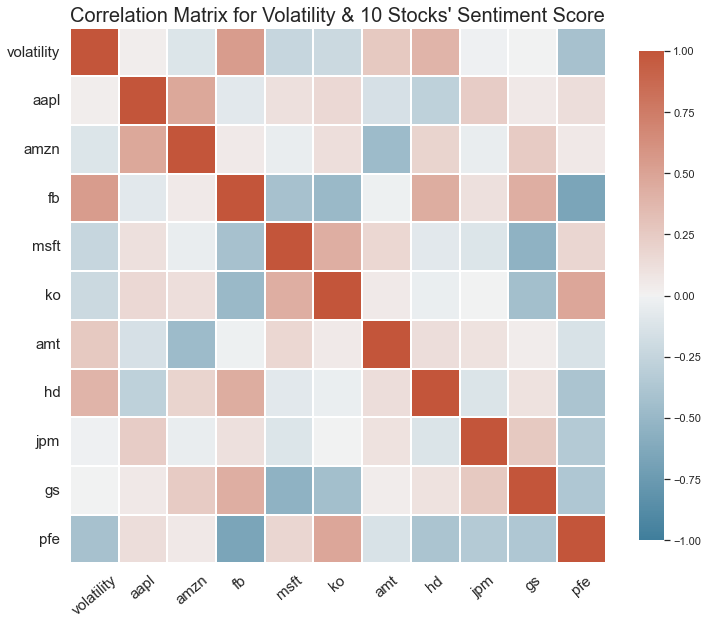

In [38]:
# Define a nice color map for our heatmap
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'figure.figsize':(12,12)})
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
        data=df_corr,  # our correlation matrix
        linewidths=0.3,  # the width of lines separating the matrix squares
        square=True,   # enforce 1:1 ratios among correlation cells
        cmap=cmap,  # use the color map we defined above
        vmax=1,  # define the max of our correlation scale
        vmin=-1, # define the min of our correlation scale
        center=0,  # The value at which the color map is centered about (white)
        cbar_kws={"shrink": .75}  # shrink the scale a bit
    )
# adjust y-axis ticks for legibility
plt.tick_params(axis='both',labelsize=14)
plt.yticks(fontsize=15, rotation=0)  
plt.xticks(fontsize=15, rotation=40)
plt.title("Correlation Matrix for Volatility & 10 Stocks' Sentiment Score", fontsize=20)
# show the heatmap
plt.show()

(array([0.5]), [Text(0.5, 0, 'volatility')])

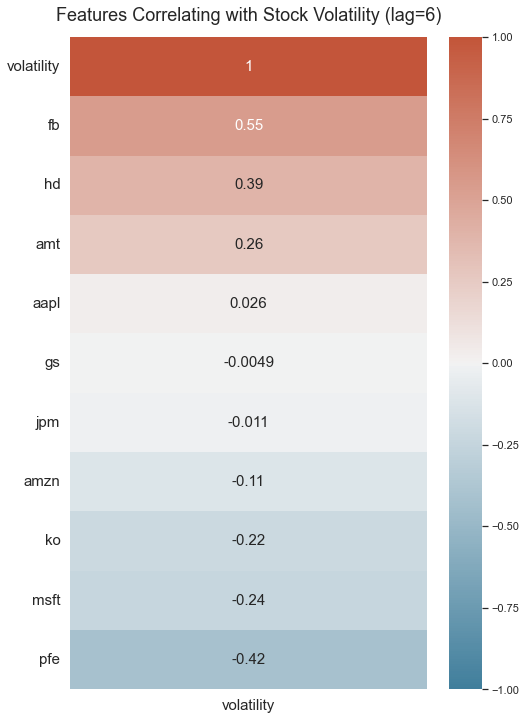

In [40]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_corr[['volatility']].sort_values(by='volatility', ascending=False), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True,
                      annot_kws={"fontsize":15}, 
                      cmap=cmap)
heatmap.set_title('Features Correlating with Stock Volatility (lag=6)', fontdict={'fontsize':18}, pad=16)
plt.tick_params(axis='both',labelsize=14)
plt.yticks(fontsize=15, rotation=0)  
plt.xticks(fontsize=15, rotation=0)

In [41]:
for maxlag in range(5,13):
    test = 'ssr-chi2test'
    
    def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

        dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

        for c in dataset.columns:
            for r in dataset.index:
                test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
                p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
                if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

                min_p_value = np.min(p_values)
                dataset.loc[r,c] = min_p_value # CORRECTED!!

        dataset.columns = [var + '_x' for var in variables]

        dataset.index = [var + '_y' for var in variables]

        return dataset

    result = grangers_causality_matrix(X_train_transformed, variables = X_train_transformed.columns) # CHANGE NAME

    # Add MultiIndex Header
    title = "Granger Causality Test Results:" # CHANGE NAME
    styler = result.style.set_caption(title).set_table_styles([{'selector': 'caption', # CHANGE NAME
                                                                      'props': [('color', 'black'),
                                                                                ('font-size', '12px'),
                                                                                ('font-style', 'italic'),
                                                                                ('font-weight', 'bold'),
                                                                                ('text-align', 'center')]}])

    print(maxlag)
    display(styler)

5


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.176400,0.123000,0.422100,0.296300,0.098900,0.266300,0.510300,0.675400,0.535900,0.694900
aapl_y,0.320000,1.000000,0.170300,0.448900,0.139800,0.030400,0.078600,0.005900,0.276400,0.050600,0.179300
amzn_y,0.179600,0.242100,1.000000,0.161300,0.044400,0.155800,0.202000,0.491400,0.020200,0.324200,0.647400
fb_y,0.502700,0.154900,0.222900,1.000000,0.474200,0.201600,0.008100,0.057800,0.241200,0.023100,0.039200
msft_y,0.365300,0.000400,0.272800,0.039800,1.000000,0.118200,0.287900,0.108000,0.004400,0.011100,0.555600
ko_y,0.019700,0.335000,0.031300,0.037500,0.729600,1.000000,0.148500,0.317700,0.500400,0.595200,0.497400
amt_y,0.120000,0.148100,0.336700,0.081400,0.481300,0.137800,1.000000,0.068500,0.002400,0.026000,0.002600
hd_y,0.002700,0.005700,0.005600,0.200900,0.009000,0.337400,0.059500,1.000000,0.043400,0.329300,0.000300
jpm_y,0.126900,0.000000,0.090100,0.066300,0.148700,0.292800,0.000000,0.080400,1.000000,0.266600,0.211000
gs_y,0.023300,0.021000,0.211500,0.113400,0.005700,0.136900,0.507300,0.129400,0.881200,1.000000,0.467700


6


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.176400,0.071500,0.422100,0.025100,0.074800,0.266300,0.188900,0.509100,0.219400,0.694900
aapl_y,0.301800,1.000000,0.170300,0.448900,0.139800,0.010000,0.078600,0.000000,0.276400,0.050600,0.040900
amzn_y,0.022800,0.242100,1.000000,0.161300,0.044400,0.155800,0.066100,0.491400,0.020200,0.324200,0.466200
fb_y,0.502700,0.056200,0.222900,1.000000,0.241900,0.201600,0.000100,0.025200,0.241200,0.023100,0.039200
msft_y,0.316600,0.000400,0.208400,0.039800,1.000000,0.118200,0.148100,0.108000,0.004400,0.011100,0.555600
ko_y,0.019700,0.046100,0.002600,0.037500,0.042900,1.000000,0.148500,0.317700,0.500400,0.595200,0.497400
amt_y,0.120000,0.148100,0.061800,0.081400,0.247600,0.137800,1.000000,0.068500,0.002400,0.026000,0.002600
hd_y,0.002700,0.005700,0.005600,0.200900,0.009000,0.337400,0.003700,1.000000,0.043400,0.329300,0.000300
jpm_y,0.126900,0.000000,0.090100,0.066300,0.148700,0.292800,0.000000,0.049600,1.000000,0.059800,0.195400
gs_y,0.007400,0.021000,0.154600,0.076800,0.002100,0.136900,0.507300,0.129400,0.881200,1.000000,0.467700


7


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.176400,0.071500,0.422100,0.025100,0.074800,0.221000,0.046400,0.509100,0.045800,0.503000
aapl_y,0.174800,1.000000,0.170300,0.374900,0.033600,0.008400,0.078600,0.000000,0.276400,0.009800,0.001100
amzn_y,0.013700,0.242100,1.000000,0.161300,0.044400,0.155800,0.007300,0.491400,0.002200,0.324200,0.466200
fb_y,0.502700,0.056200,0.222900,1.000000,0.178800,0.201600,0.000000,0.000200,0.162600,0.023100,0.000000
msft_y,0.180100,0.000400,0.205300,0.039800,1.000000,0.118200,0.025900,0.108000,0.004400,0.011100,0.555600
ko_y,0.019700,0.044600,0.002600,0.037500,0.032500,1.000000,0.002000,0.317700,0.500400,0.367000,0.497400
amt_y,0.120000,0.148100,0.006700,0.081400,0.137200,0.067500,1.000000,0.068500,0.002400,0.026000,0.000200
hd_y,0.002700,0.005700,0.005600,0.200900,0.009000,0.337400,0.000000,1.000000,0.043400,0.135800,0.000200
jpm_y,0.126900,0.000000,0.084800,0.066300,0.148700,0.242200,0.000000,0.049600,1.000000,0.059800,0.022100
gs_y,0.007300,0.021000,0.119400,0.024000,0.002100,0.036400,0.507300,0.129400,0.881200,1.000000,0.467700


8


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.034600,0.000400,0.216800,0.025100,0.074800,0.154600,0.046400,0.463800,0.045800,0.392500
aapl_y,0.174800,1.000000,0.170300,0.240300,0.027700,0.005900,0.004300,0.000000,0.276400,0.007100,0.001100
amzn_y,0.013700,0.211100,1.000000,0.016900,0.012500,0.155800,0.007300,0.485500,0.002200,0.324200,0.466200
fb_y,0.502700,0.023200,0.167200,1.000000,0.178800,0.201600,0.000000,0.000000,0.047700,0.023100,0.000000
msft_y,0.149300,0.000100,0.190800,0.039800,1.000000,0.118200,0.001800,0.108000,0.004400,0.011100,0.555600
ko_y,0.019700,0.044600,0.002600,0.021100,0.015500,1.000000,0.001800,0.305200,0.476400,0.367000,0.497400
amt_y,0.120000,0.038900,0.006700,0.001500,0.137200,0.037000,1.000000,0.068500,0.001400,0.002300,0.000200
hd_y,0.000100,0.005700,0.005600,0.200900,0.009000,0.191300,0.000000,1.000000,0.043400,0.095000,0.000000
jpm_y,0.126900,0.000000,0.000100,0.066300,0.040400,0.242200,0.000000,0.000600,1.000000,0.054000,0.022100
gs_y,0.007300,0.012900,0.018500,0.008000,0.002100,0.036400,0.507300,0.129400,0.881200,1.000000,0.401400


9


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.026100,0.000400,0.129700,0.001100,0.074800,0.154600,0.020700,0.047800,0.045800,0.286200
aapl_y,0.109600,1.000000,0.170300,0.240300,0.000600,0.002000,0.004300,0.000000,0.184800,0.005800,0.001100
amzn_y,0.013700,0.157300,1.000000,0.014700,0.012500,0.155800,0.001300,0.413300,0.000100,0.324200,0.133400
fb_y,0.305700,0.000000,0.167200,1.000000,0.134200,0.103400,0.000000,0.000000,0.045800,0.003900,0.000000
msft_y,0.098800,0.000100,0.190800,0.000100,1.000000,0.062000,0.001100,0.000900,0.004400,0.000600,0.555600
ko_y,0.019700,0.044600,0.002600,0.021100,0.015500,1.000000,0.001800,0.305200,0.036600,0.367000,0.497400
amt_y,0.120000,0.038900,0.000000,0.000700,0.135900,0.037000,1.000000,0.068500,0.000000,0.002200,0.000200
hd_y,0.000100,0.005700,0.003700,0.200900,0.009000,0.018800,0.000000,1.000000,0.043400,0.095000,0.000000
jpm_y,0.126900,0.000000,0.000000,0.066300,0.040400,0.006900,0.000000,0.000100,1.000000,0.054000,0.022100
gs_y,0.007300,0.012900,0.018500,0.006300,0.002100,0.036400,0.482600,0.019000,0.734800,1.000000,0.172000


10


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.007500,0.000000,0.080500,0.000200,0.074800,0.154600,0.016300,0.047800,0.045800,0.286200
aapl_y,0.000000,1.000000,0.170300,0.240300,0.000000,0.000600,0.004300,0.000000,0.184800,0.000100,0.001100
amzn_y,0.013000,0.157300,1.000000,0.003500,0.001400,0.155800,0.000000,0.215800,0.000100,0.324200,0.003200
fb_y,0.194900,0.000000,0.167200,1.000000,0.134200,0.068000,0.000000,0.000000,0.045800,0.000000,0.000000
msft_y,0.000000,0.000000,0.000400,0.000100,1.000000,0.062000,0.001100,0.000900,0.004400,0.000500,0.021300
ko_y,0.019700,0.044600,0.000200,0.021100,0.000000,1.000000,0.001600,0.305200,0.015200,0.164000,0.497400
amt_y,0.120000,0.002800,0.000000,0.000700,0.025200,0.004600,1.000000,0.007500,0.000000,0.000000,0.000000
hd_y,0.000000,0.005700,0.000000,0.200900,0.009000,0.001600,0.000000,1.000000,0.002300,0.073900,0.000000
jpm_y,0.126900,0.000000,0.000000,0.066300,0.039100,0.006900,0.000000,0.000100,1.000000,0.054000,0.000100
gs_y,0.007300,0.000000,0.018500,0.006300,0.002100,0.036400,0.482600,0.019000,0.734800,1.000000,0.165500


11


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.000000,0.000000,0.080500,0.000000,0.074800,0.069300,0.000100,0.047800,0.002600,0.000500
aapl_y,0.000000,1.000000,0.048900,0.087200,0.000000,0.000600,0.000200,0.000000,0.008300,0.000000,0.000000
amzn_y,0.000200,0.111000,1.000000,0.000000,0.000500,0.155800,0.000000,0.000000,0.000100,0.164600,0.003200
fb_y,0.002000,0.000000,0.167200,1.000000,0.028400,0.026300,0.000000,0.000000,0.045800,0.000000,0.000000
msft_y,0.000000,0.000000,0.000000,0.000000,1.000000,0.062000,0.000000,0.000000,0.004400,0.000300,0.021300
ko_y,0.000400,0.022500,0.000000,0.000100,0.000000,1.000000,0.000200,0.021800,0.009300,0.007200,0.497400
amt_y,0.000700,0.002800,0.000000,0.000700,0.025200,0.000200,1.000000,0.000000,0.000000,0.000000,0.000000
hd_y,0.000000,0.005700,0.000000,0.024000,0.009000,0.000000,0.000000,1.000000,0.000000,0.000200,0.000000
jpm_y,0.058000,0.000000,0.000000,0.066300,0.008100,0.006900,0.000000,0.000100,1.000000,0.054000,0.000000
gs_y,0.007300,0.000000,0.002500,0.002200,0.000000,0.036400,0.482600,0.000000,0.734800,1.000000,0.027400


12


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047600,0.000100,0.047800,0.000000,0.000500
aapl_y,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000200,0.000000,0.008300,0.000000,0.000000
amzn_y,0.000000,0.111000,1.000000,0.000000,0.000000,0.155800,0.000000,0.000000,0.000000,0.005000,0.000200
fb_y,0.000000,0.000000,0.000900,1.000000,0.028400,0.000000,0.000000,0.000000,0.003800,0.000000,0.000000
msft_y,0.000000,0.000000,0.000000,0.000000,1.000000,0.055100,0.000000,0.000000,0.000000,0.000000,0.010200
ko_y,0.000000,0.001500,0.000000,0.000000,0.000000,1.000000,0.000100,0.002600,0.000000,0.000600,0.165200
amt_y,0.000400,0.000100,0.000000,0.000000,0.025200,0.000200,1.000000,0.000000,0.000000,0.000000,0.000000
hd_y,0.000000,0.000400,0.000000,0.000100,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
jpm_y,0.000000,0.000000,0.000000,0.066300,0.000000,0.006900,0.000000,0.000000,1.000000,0.000700,0.000000
gs_y,0.000000,0.000000,0.000000,0.002200,0.000000,0.003000,0.045700,0.000000,0.734800,1.000000,0.021500


In [44]:
# lag5-12
df_granger = pd.DataFrame(np.array([[1.000000,0.176400,0.123000,0.422100,0.296300,0.098900,0.266300,0.510300,0.675400,0.535900,0.694900], 
                                    [1.000000,0.176400,0.071500,0.422100,0.025100,0.074800,0.266300,0.188900,0.509100,0.219400,0.694900], 
                                    [1.000000,0.176400,0.071500,0.422100,0.025100,0.074800,0.221000,0.046400,0.509100,0.045800,0.503000],
                                    [1.000000,0.034600,0.000400,0.216800,0.025100,0.074800,0.154600,0.046400,0.463800,0.045800,0.392500],
                                    [1.000000,0.026100,0.000400,0.129700,0.001100,0.074800,0.154600,0.020700,0.047800,0.045800,0.286200],
                                    [1.000000,0.007500,0.000000,0.080500,0.000200,0.074800,0.154600,0.016300,0.047800,0.045800,0.286200],
                                    [1.000000,0.000000,0.000000,0.080500,0.000000,0.074800,0.069300,0.000100,0.047800,0.002600,0.000500],
                                    [1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047600,0.000100,0.047800,0.000000,0.000500]]),
                            columns=['volatility_x','aapl_x','amzn_x','fb_x','msft_x','ko_x','amt_x','hd_x','jpm_x','gs_x','pfe_x'],
                            index=['L5_volatility_y','L6_volatility_y','L7_volatility_y','L8_volatility_y','L9_volatility_y','L10_volatility_y','L11_volatility_y','L12_volatility_y'],
                         )
df_granger.style.set_caption("Granger Causality Test Results (lag 5-12):")
# df_granger

,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
L5_volatility_y,1.000000,0.176400,0.123000,0.422100,0.296300,0.098900,0.266300,0.510300,0.675400,0.535900,0.694900
L6_volatility_y,1.000000,0.176400,0.071500,0.422100,0.025100,0.074800,0.266300,0.188900,0.509100,0.219400,0.694900
L7_volatility_y,1.000000,0.176400,0.071500,0.422100,0.025100,0.074800,0.221000,0.046400,0.509100,0.045800,0.503000
L8_volatility_y,1.000000,0.034600,0.000400,0.216800,0.025100,0.074800,0.154600,0.046400,0.463800,0.045800,0.392500
L9_volatility_y,1.000000,0.026100,0.000400,0.129700,0.001100,0.074800,0.154600,0.020700,0.047800,0.045800,0.286200
L10_volatility_y,1.000000,0.007500,0.000000,0.080500,0.000200,0.074800,0.154600,0.016300,0.047800,0.045800,0.286200
L11_volatility_y,1.000000,0.000000,0.000000,0.080500,0.000000,0.074800,0.069300,0.000100,0.047800,0.002600,0.000500
L12_volatility_y,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047600,0.000100,0.047800,0.000000,0.000500


In [57]:
X_train_transformed_msft = X_train_transformed[['volatility','msft']]
maxlag = 6
test = 'ssr-chi2test'

def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

        dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

        for c in dataset.columns:
            for r in dataset.index:
                test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
                p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
                if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

                min_p_value = np.min(p_values)
                dataset.loc[r,c] = min_p_value # CORRECTED!!

        dataset.columns = [var + '_x' for var in variables]

        dataset.index = [var + '_y' for var in variables]

        return dataset

result = grangers_causality_matrix(X_train_transformed_msft, variables = X_train_transformed_msft.columns)

# Add MultiIndex Header
title = "Granger Causality Test Results for Microsoft (lag=6):" # CHANGE NAME
styler = result.style.set_caption(title).set_table_styles([{'selector': 'caption', # CHANGE NAME
                                                                  'props': [('color', 'black'),
                                                                            ('font-size', '12px'),
                                                                            ('font-style', 'italic'),
                                                                            ('font-weight', 'bold'),
                                                                            ('text-align', 'center')]}])

print(maxlag)
display(styler)

6


,volatility_x,msft_x
volatility_y,1.000000,0.025100
msft_y,0.316600,1.000000


In [61]:
df_amzn = pd.read_csv("polarity_data/polarity_amzn.csv", index_col=0)
df_amzn=df_amzn[['id','text','time','polarity_hiv4']]
df_amzn.head()

,id,text,time,polarity_hiv4
0,443023955,$VPLM gotta love this action!! Sorry $AMZN,2022-03-10T18:23:19Z,-0.999999
1,443023814,$AMZN gap fill to 2975?,2022-03-10T18:22:53Z,0.999999
2,443023503,$AMZN 2950 lotto calls @19,2022-03-10T18:22:07Z,0.000000
3,443023339,$AMZN how come a company worth trillions annou...,2022-03-10T18:21:41Z,1.000000
4,443022841,$AMZN bull engulfing,2022-03-10T18:20:24Z,-0.999999


In [5]:

data_perf = {'Correlation Coefficient with Stock Volatility': [1,
                                        0.55, 
                                         0.39,
                                         0.26,
                                         0.026,
                                         -0.0049,
                                         -0.011,
                                         -0.11,
                                         -0.22,
                                         -0.24,
                                         -0.42]}

df_perf = pd.DataFrame(data_perf, index=['volatility', 
                                         'fb',
                                        'hd',
                                        'amt',
                                        'appl',
                                        'gs',
                                        'jpm',
                                        'amzn',
                                        'ko',
                                        'msft',
                                        'pfe'])
df_perf.style.set_table_attributes("style='display:inline'").set_caption("Comparison of Model Performance between Yahoo Finance and Community Detectionn")
pd.set_option('display.precision', 3)
df_perf

,Correlation Coefficient with Stock Volatility
volatility,1.000
fb,0.550
hd,0.390
amt,0.260
appl,0.026
gs,-0.005
jpm,-0.011
amzn,-0.110
ko,-0.220
msft,-0.240
